# Hotel Marketing Case study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
case_study=pd.read_csv('D:/python learning/hotel marketing.csv')

In [3]:
case_study

,Date,Geographic Region,Platform,Marketing Channel,Visits,Qualified Shoppers,Bounced Visits,Gross Orders,Net Orders,Net Room Nights
0,1/1/2017,Geo Region 1,Desktop,Channel 1,3011,1878,811,1139,957,1848
1,1/1/2017,Geo Region 1,Desktop,Channel 2,119684,82504,26541,12489,10369,19897
2,1/1/2017,Geo Region 1,Desktop,Channel 3,25612,11828,7398,1399,1139,2257
3,1/1/2017,Geo Region 1,Desktop,Channel 4,3115,1463,1393,69,50,81
4,1/1/2017,Geo Region 1,Desktop,Channel 5,5657,4307,1346,641,517,921
...,...,...,...,...,...,...,...,...,...,...
87851,31/12/2019,Geo Region 4,Mobile,Channel 6,36235,12773,19264,110,86,206
87852,31/12/2019,Geo Region 4,Mobile,Channel 7,18389,7074,9493,79,69,155
87853,31/12/2019,Geo Region 4,Mobile,Channel 8,501,302,200,8,6,15
87854,31/12/2019,Geo Region 4,Mobile,Channel 9,9890,6330,3560,44,30,55


In [4]:
len(case_study)

87856

In [5]:
case_study.dtypes


Date                  object
Geographic Region     object
Platform              object
Marketing Channel     object
Visits                 int64
Qualified Shoppers     int64
Bounced Visits         int64
Gross Orders           int64
Net Orders             int64
Net Room Nights        int64
dtype: object

In [6]:

case_study.isnull().sum()

Date                  0
Geographic Region     0
Platform              0
Marketing Channel     0
Visits                0
Qualified Shoppers    0
Bounced Visits        0
Gross Orders          0
Net Orders            0
Net Room Nights       0
dtype: int64

In [7]:
case_study.Date.unique()

array(['1/1/2017', '2/1/2017', '3/1/2017', ..., '29/12/2019',
       '30/12/2019', '31/12/2019'], dtype=object)

In [8]:
case_study.Platform.unique()

array(['Desktop', 'Mobile'], dtype=object)

In [16]:
case_study['Geographic Region']

0        Geo Region 1
1        Geo Region 1
2        Geo Region 1
3        Geo Region 1
4        Geo Region 1
             ...     
87851    Geo Region 4
87852    Geo Region 4
87853    Geo Region 4
87854    Geo Region 4
87855    Geo Region 4
Name: Geographic Region, Length: 87856, dtype: object

In [17]:

case_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87856 entries, 0 to 87855
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                87856 non-null  object
 1   Geographic Region   87856 non-null  object
 2   Platform            87856 non-null  object
 3   Marketing Channel   87856 non-null  object
 4   Visits              87856 non-null  int64 
 5   Qualified Shoppers  87856 non-null  int64 
 6   Bounced Visits      87856 non-null  int64 
 7   Gross Orders        87856 non-null  int64 
 8   Net Orders          87856 non-null  int64 
 9   Net Room Nights     87856 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 6.7+ MB


In [18]:

case_study.describe()

,Visits,Qualified Shoppers,Bounced Visits,Gross Orders,Net Orders,Net Room Nights
count,87856.000000,87856.000000,87856.000000,87856.000000,87856.000000,87856.000000
mean,27790.999875,12933.446674,12493.199099,1165.226097,940.221248,1994.702012
std,42464.669508,21935.477879,23037.941038,3160.550979,2552.623371,5504.545651
min,1.000000,0.000000,0.000000,0.000000,-100.000000,-267.000000
25%,4150.750000,1718.750000,1568.000000,75.000000,59.000000,129.000000
50%,12291.500000,5805.000000,4917.000000,329.000000,261.000000,554.000000
75%,33631.000000,15200.500000,13944.000000,1012.000000,807.000000,1659.000000
max,683764.000000,280919.000000,546089.000000,38354.000000,35318.000000,79141.000000


Index(['Date', 'Geographic Region', 'Platform', 'Marketing Channel', 'Visits',
       'Qualified Shoppers', 'Bounced Visits', 'Gross Orders', 'Net Orders',
       'Net Room Nights'],
      dtype='object')

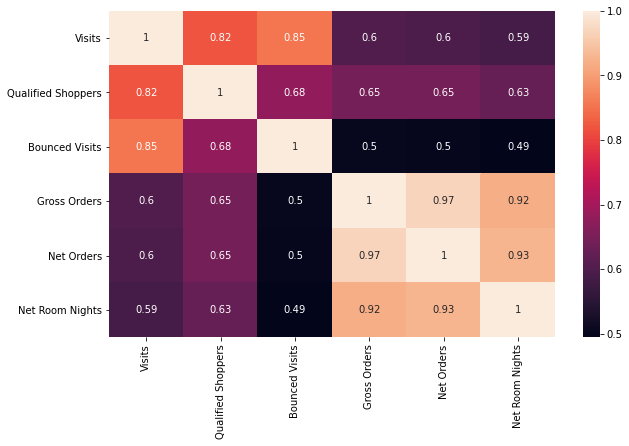

In [19]:
corr = case_study.corr(method='kendall')
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
case_study.columns

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [23]:
#Defining the independent variables and dependent variables
x = case_study.iloc[:,[4,5,6,7,8]]
y = case_study['Net Room Nights']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

72151      165
38575     1476
50721    28026
40714       58
7166      2305
Name: Net Room Nights, dtype: int64

In [24]:
x_train.shape

(79070, 5)

In [25]:
x_test.shape

(8786, 5)

In [26]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train, y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9888826680803591

In [32]:
y_pred

array([ 395.42957367,  976.70944406,  320.73424735, ..., 1412.24911884,
        137.35626399,  300.41638124])